In [135]:
# Initial imports
import os
import requests
import json
import pprint
import pandas as pd
from dotenv import load_dotenv
import os
import alpaca_trade_api as tradeapi
from pathlib import Path
from MCForecastTools import MCSimulation

%matplotlib inline

In [136]:
# Load .env enviroment variables
load_dotenv()

True

In [137]:
# Set current amount of crypto assets
monthly_income = 12000
my_btc = 1.2
my_eth = 5.3
my_spy = 50
my_agg = 200

In [138]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [139]:
# Fetch current BTC price
btc_resp = requests.get(btc_url)
btc_dict = btc_resp.json()
my_btc_price = btc_dict['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_resp = requests.get(eth_url)
eth_dict = eth_resp.json()
my_eth_price = eth_dict['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * my_btc_price
my_eth_value = my_eth * my_eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $58467.60
The current value of your 5.3 ETH is $17056.83


In [140]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

# Format current date as ISO format
today = pd.Timestamp("2020-08-25", tz="America/New_York").isoformat()
start_date = pd.Timestamp("2015-08-25", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [141]:
# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = today,
    limit = 1000
).df

df_portfolio.head()


AGG                                         \
                             open      high      low    close     volume   
time                                                                       
2016-09-02 00:00:00-04:00  112.44  112.4400  112.181  112.330  1586715.0   
2016-09-06 00:00:00-04:00  112.36  112.6750  112.290  112.550  3457599.0   
2016-09-07 00:00:00-04:00  112.76  112.7600  112.590  112.605  1647718.0   
2016-09-08 00:00:00-04:00  112.50  112.5559  112.140  112.240  2463747.0   
2016-09-09 00:00:00-04:00  111.96  111.9900  111.730  111.730  2431660.0   

                              SPY                                       
                             open    high     low   close       volume  
time                                                                    
2016-09-02 00:00:00-04:00     NaN     NaN     NaN     NaN          NaN  
2016-09-06 00:00:00-04:00  218.70  219.09  217.86  219.07   42651333.0  
2016-09-07 00:00:00-04:00  218.84  219.22  218.30  219.06   46328119.0  
2016-09-08 00:00:00-04:00  218.62  218.94  218.15  218.53   55321372.0  
2016-09-09 00:00:00-04:00  216.96  217.03  213.25  213.28  157882901.0

In [142]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in tickers:
    df_closing_prices[ticker] = df_portfolio[ticker]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Remove null values
df_closing_prices.dropna(inplace=True)

# Display sample data
df_closing_prices.tail()

AGG       SPY
2020-08-19  118.37  337.2200
2020-08-20  118.57  338.2500
2020-08-21  118.69  339.4400
2020-08-24  118.62  342.9400
2020-08-25  118.39  344.0999

In [143]:

# Compute the current value of shares
my_agg_value = my_agg * df_closing_prices['AGG'].iloc[-1]
my_spy_value = my_spy * df_closing_prices['SPY'].iloc[-1]

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17204.99
The current value of your 200 AGG shares is $23678.00


In [144]:
# Savings Health Analysis

# Consolidate financial assets data
crytpo_amt = my_btc_value + my_eth_value
share_amt = my_agg_value + my_spy_value

# Create dataframe with values of investments
df_savings = pd.DataFrame()
df_savings['amount'] = [crytpo_amt,share_amt]
index = pd.Series(['crypto','shares'])
df_savings = df_savings.set_index(index)


# Create savings DataFrame
# YOUR CODE HERE!

# Display savings DataFrame
display(df_savings)

amount
crypto  75524.431
shares  40882.995

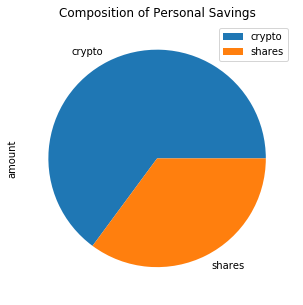

In [145]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', figsize = (5,5), title='Composition of Personal Savings')

In [146]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# Can check alternative outcomes using savings = 36000 and savings = 15000
savings = df_savings['amount'].sum()
defecit = emergency_fund - savings

# Validate saving health
if savings > emergency_fund:
    print('Congratulations for having enough money in this fund.')
elif savings == emergency_fund:
    print('Congratulations on meeting this financial goal.')
else:
    print(f'Unfortunately you are ${defecit:0.2f} away from reaching the goal.')

Congratulations for having enough money in this fund.


In [147]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date_mc = pd.Timestamp('2016-08-25', tz='America/New_York').isoformat()
end_date_mc = pd.Timestamp('2025-08-25', tz='America/New_York').isoformat()

In [149]:
# Display raw sample data for the Monte Carolo Simulation
df_portfolio.head()

AGG                                         \
                             open      high      low    close     volume   
time                                                                       
2016-09-02 00:00:00-04:00  112.44  112.4400  112.181  112.330  1586715.0   
2016-09-06 00:00:00-04:00  112.36  112.6750  112.290  112.550  3457599.0   
2016-09-07 00:00:00-04:00  112.76  112.7600  112.590  112.605  1647718.0   
2016-09-08 00:00:00-04:00  112.50  112.5559  112.140  112.240  2463747.0   
2016-09-09 00:00:00-04:00  111.96  111.9900  111.730  111.730  2431660.0   

                              SPY                                       
                             open    high     low   close       volume  
time                                                                    
2016-09-02 00:00:00-04:00     NaN     NaN     NaN     NaN          NaN  
2016-09-06 00:00:00-04:00  218.70  219.09  217.86  219.07   42651333.0  
2016-09-07 00:00:00-04:00  218.84  219.22  218.30  219.06   46328119.0  
2016-09-08 00:00:00-04:00  218.62  218.94  218.15  218.53   55321372.0  
2016-09-09 00:00:00-04:00  216.96  217.03  213.25  213.28  157882901.0

In [155]:
# Configure a Monte Carlo simulation to forecast 500 runs and 30 years for the 40/60 portfolio
MC_40_60 = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [156]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_40_60.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1         2          3          4          5    \
0     1.000000   1.000000  1.000000   1.000000   1.000000   1.000000   
1     0.984035   1.000409  0.998117   0.987700   1.010084   0.996525   
2     0.988310   0.998874  0.997214   0.977904   1.014972   1.001701   
3     0.989516   1.002265  1.009946   0.985795   1.010299   1.014643   
4     1.000576   0.989137  1.013643   0.992083   1.015024   1.029744   
5     0.988513   0.998666  1.021243   0.991186   1.002550   1.018483   
6     0.981324   0.994423  1.020516   0.990988   1.000436   1.018942   
7     0.977740   0.995909  1.027086   0.990311   0.994302   1.015524   
8     0.988625   0.992689  1.034427   0.989438   0.989588   1.018613   
9     1.004685   1.001368  1.022455   0.986236   0.995740   1.020704   
10    0.998247   0.991114  1.010522   0.985990   0.996001   1.023544   
11    1.004732   0.995561  1.008396   0.987161   0.994937   1.043871   
12    0.997497   0.992333  1.015798   0.990783   1.005226   1.042388   
13    1.001433   0.989406  1.015089   0.989262   0.992233   1.039191   
14    1.011984   0.993363  1.003272   0.986364   0.986150   1.035482   
15    1.020165   0.991203  1.006375   0.976951   0.984936   1.032783   
16    1.033607   0.999593  0.996659   0.980852   0.998162   1.031367   
17    1.031668   0.986729  0.999798   0.976651   1.013428   1.028355   
18    1.022395   0.998529  1.000477   0.978364   1.021242   1.023683   
19    1.017941   0.998610  1.003005   0.961665   1.021098   1.024908   
20    1.006893   1.011434  1.010649   0.955664   1.039008   1.022895   
21    1.001457   1.023375  1.010705   0.939381   1.032336   1.028675   
22    0.980479   1.021251  0.997233   0.941321   1.017238   1.019519   
23    0.973908   1.023052  1.001554   0.942211   1.024749   1.006687   
24    0.978283   1.030457  0.996834   0.936417   1.033069   1.003419   
25    0.978355   1.038711  1.002516   0.941653   1.028690   0.995598   
26    0.977337   1.042775  1.003109   0.939039   1.040221   0.996018   
27    0.968215   1.046562  1.004102   0.940134   1.036786   0.990183   
28    0.965692   1.030647  1.008412   0.936559   1.036055   0.990283   
29    0.967792   1.033184  0.996047   0.947129   1.027284   0.991667   
...        ...        ...       ...        ...        ...        ...   
7531  3.530190  16.559767  9.865173  23.958438  43.471662  24.274070   
7532  3.546814  16.716213  9.887492  23.919655  42.953696  24.252309   
7533  3.562674  16.820485  9.983874  24.183199  43.636861  24.378231   
7534  3.556361  16.772147  9.894606  24.661763  43.551474  24.255941   
7535  3.593468  16.952260  9.775104  24.854623  43.124849  23.943876   
7536  3.670609  17.030428  9.704704  24.833081  43.425571  23.675636   
7537  3.656860  17.178817  9.621114  25.030689  43.628614  23.637015   
7538  3.621892  17.102513  9.602540  24.733457  43.654890  23.993051   
7539  3.609347  17.220670  9.654080  24.776964  43.828465  24.156759   
7540  3.599748  17.109392  9.679719  24.701445  43.728548  24.445325   
7541  3.572025  16.879718  9.642132  24.592175  43.992462  24.104232   
7542  3.599927  16.925523  9.584685  24.830955  43.881365  23.979916   
7543  3.629125  16.798184  9.624270  24.771985  44.616599  23.916639   
7544  3.618889  16.564544  9.634769  25.046686  44.626933  23.704586   
7545  3.618053  16.616972  9.600702  24.880129  44.421353  23.991321   
7546  3.608529  16.788989  9.713531  25.242255  44.203158  23.800537   
7547  3.568442  16.926038  9.590105  25.198512  43.936390  23.809990   
7548  3.555024  17.062855  9.514310  25.315035  43.772883  23.999083   
7549  3.514951  17.087816  9.515635  25.328306  43.955976  23.810843   
7550  3.513738  17.250405  9.655056  24.728608  42.969718  23.731615   
7551  3.521423  17.289696  9.690108  24.623571  43.633208  23.606472   
7552  3.513427  17.126910  9.756366  24.486880  42.989770  23.700973   
7553  3.497322  17.155229  9.738381  24.489275  42.966366  23.454162   
7554  3.535062  16.890661  9.794704  24.550237  42.

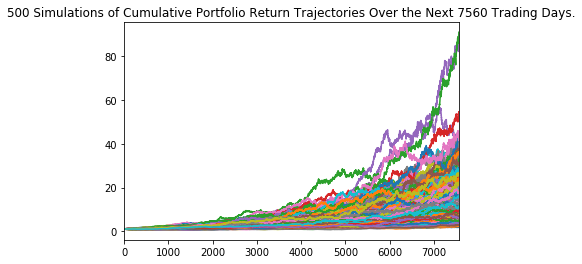

In [157]:
# Plot simulation outcomes
line_plot = MC_40_60.plot_simulation()

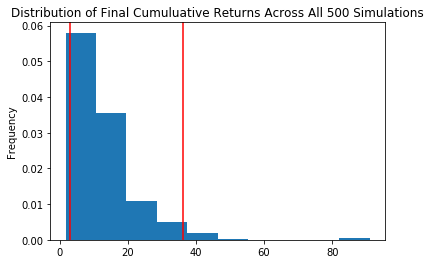

In [158]:
# Plot probability distribution and confidence intervals
dist_plot = MC_40_60.plot_distribution()

In [160]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_40_60 = MC_40_60.summarize_cumulative_return()

# Print summary statistics
print(tbl_40_60)

count           500.000000
mean             13.058017
std               9.780431
min               1.757812
25%               6.698189
50%              10.379325
75%              16.603362
max              91.082596
95% CI Lower      3.093802
95% CI Upper     36.365837
Name: 7560, dtype: float64


In [161]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl_40_60[8]*initial_investment,2)
ci_upper = round(tbl_40_60[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $61876.05 and $727316.73


In [163]:
# Set initial investment
initial_investment_150 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_150 = round(tbl_40_60[8]*initial_investment_150,2)
ci_upper_150 = round(tbl_40_60[9]*initial_investment_150,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_150} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_150} and ${ci_upper_150}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $92814.07 and $1090975.1
